<a href="https://colab.research.google.com/github/brajeshkumar1989/featureengineering/blob/main/Feature_engineering_Missing_Values_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Sample Imputation (2nd way to handle NAN)

Aim: Random sample imputation is consists of taking random observation from the dataset and we use this observation to replace the NAN values.

### When should it be used?

It assumes that the data are missing at random(MCAR)

In [ ]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df.isnull().mean()  #to get the percentage of null value for each attributes

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
#after droping all null values it is picking any value randomly , this line is just for understanding and it is not part of the code.
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
#replace null value with random sampling
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  #it will have the random sample to fill the NAN
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #pandas needs to have same index in order to merge the dataset
  #below line is finding index of all NAN values
  random_sample.index=df[df[variable].isnull()].index
  #below line is replacing each NAN with random sample value.
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median=df.Age.median()

In [ ]:
median

28.0

In [ ]:
impute_nan(df,'Age',median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

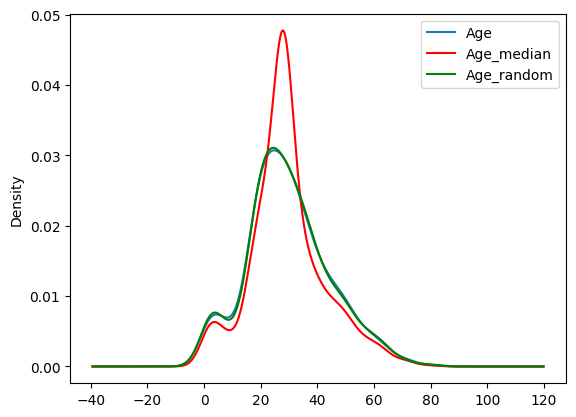

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax) #kernel density estimator (kde)
df['Age_median'].plot(kind='kde',ax=ax, color='red')
df['Age_random'].plot(kind='kde',ax=ax, color='green')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#so random sample is better then using median to replae NAN

### Advantages
1. Easy to implement
2. There is less distortion


### Disadvantages
1. every situation randomness won't work

### Capturing NAN values with a new feature (3rd way to handle NAN)

It works well if the data are not missing completely at random

It can be used for MNAR situation:

Missing data not at random(MNAR) : Systematic missing values
there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

example: Cabin and age column

In [ ]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
df.Age.median()

28.0

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [ ]:
df.head(10)

#here Age missing value has been changed with median
#new feature Age_NAN is showing the importance by value as 1 like something happend with Age column.

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages
1. Easy to implement
2. Capture the importance of missing values

### Disadvantage
1. creating additional feature (this would lead to Curse of Dimentionality)

## End of Distribution imputation (4th way to handle NAN)



In [ ]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

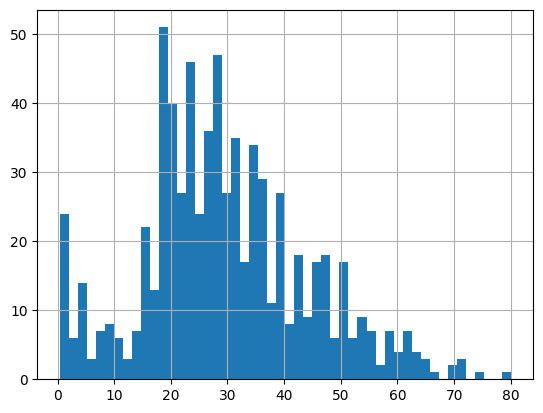

In [ ]:
df.Age.hist(bins=50)

In [ ]:
#End of Distribution imputation uses value which is aways from 3rd standard deviation and replace all NAN value
extreme=df.Age.mean()+3*df.Age.std()

<Axes: ylabel='Age'>

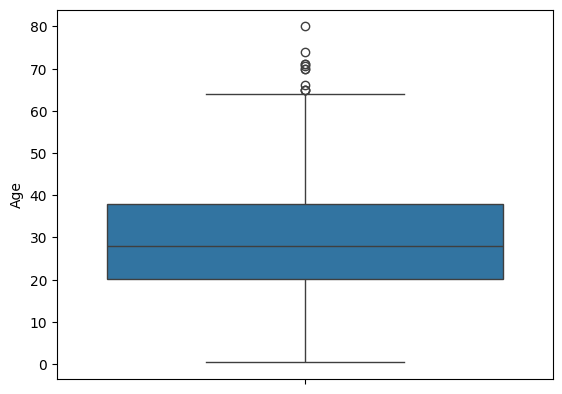

In [ ]:
import seaborn as sns
sns.boxplot(data=df['Age'])

In [ ]:
def impute_nan(df,variable,median,extreme):
  #create a new attribute and fill NAN with extreme value
  df[variable+'_end_distribution']=df[variable].fillna(extreme)
  #below one just to replace actual attribute value NAN with median , so later we can compare new variable and actual variable
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

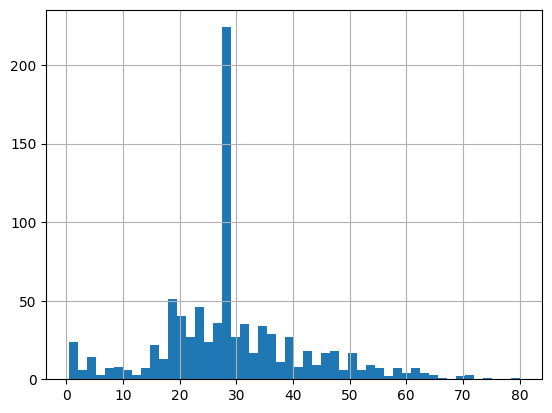

In [ ]:
# Histogram is showing that high value in the middle when simple median value got used to replace NAN,
# if we draw box plot graph then these high value will be appear as outliars and after using extreme value those otliars can shift to right end of the graph as a result it will remove outliars.
df['Age'].hist(bins=50)

<Axes: >

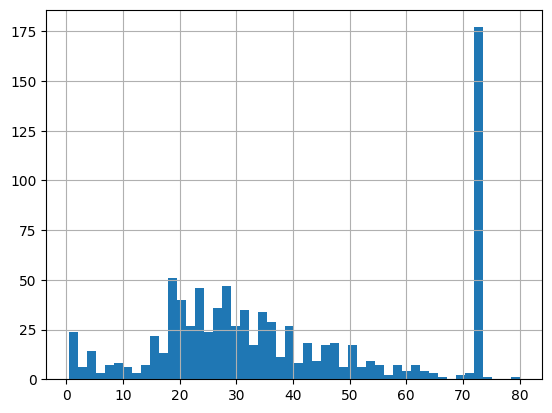

In [ ]:
df['Age_end_distribution'].hist(bins=50)

<Axes: ylabel='Age_end_distribution'>

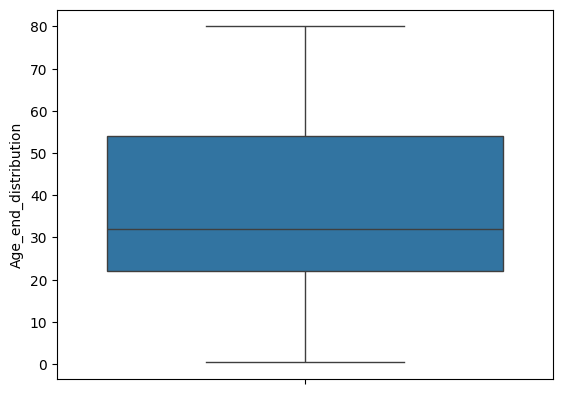

In [ ]:
#no outliars found even after replacing NAN with extreme value
sns.boxplot(df['Age_end_distribution'])

### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one


### Disadvantages
1. Distorts the original distribution of the variable
2. Is missingness is not important, it may mask the predective power of the original variable by distorting its distribution
3. if the number of NAN is big, it will mask true outliers in the distribution
4. If the number of NAN is small, the replaced NAN may be considered an outlier and pre-processed in a subsequent  feature engineering